In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import datetime
import seaborn
import matplotlib.cm as cm


# Loading the dataset

In [44]:
fitbit_df = pd.read_csv('../../data/client_data/raw/fitbit/fitbit-daily-data-1697722691952.csv', delimiter=',')

In [45]:
fitbit_df.head()

,id,sleep_target,sleep_value,steps,calories_target,calories_value,createdAt,updatedAt,intensity,min_heart_rate,max_heart_rate,user/id,user/email,user/full_name,user/disable_survey
0,9,480,403,8416.0,2048.0,1748.0,2023-05-08T15:56:00.674Z,2023-05-09T23:56:00.846Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,480,403,8416.0,2048.0,1748.0,2023-05-08T15:56:01.691Z,2023-05-09T23:56:03.334Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,480,403,8416.0,2048.0,1748.0,2023-05-08T15:56:02.348Z,2023-05-09T23:56:04.213Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,480,403,8416.0,2048.0,1748.0,2023-05-08T15:56:02.992Z,2023-05-09T23:56:05.011Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,480,403,8416.0,2048.0,1748.0,2023-05-08T17:56:01.406Z,2023-05-09T23:56:02.232Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
fitbit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   375 non-null    int64  
 1   sleep_target         374 non-null    object 
 2   sleep_value          265 non-null    object 
 3   steps                292 non-null    float64
 4   calories_target      372 non-null    float64
 5   calories_value       372 non-null    float64
 6   createdAt            375 non-null    object 
 7   updatedAt            375 non-null    object 
 8   intensity            168 non-null    float64
 9   min_heart_rate       32 non-null     float64
 10  max_heart_rate       32 non-null     float64
 11  user/id              37 non-null     float64
 12  user/email           37 non-null     object 
 13  user/full_name       37 non-null     object 
 14  user/disable_survey  37 non-null     object 
dtypes: float64(7), int64(1), object(7)
memor

# Error data values:

In [47]:
fitbit_df[fitbit_df['sleep_target'] == '[object Object]']

,id,sleep_target,sleep_value,steps,calories_target,calories_value,createdAt,updatedAt,intensity,min_heart_rate,max_heart_rate,user/id,user/email,user/full_name,user/disable_survey
211,220,[object Object],[object Object],NaN,NaN,NaN,2023-06-30T09:00:00.599Z,2023-06-30T09:00:00.599Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,229,[object Object],[object Object],NaN,NaN,NaN,2023-07-02T12:33:07.534Z,2023-07-02T12:33:07.534Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,347,[object Object],[object Object],3855.0,2184.0,1806.0,2023-10-11T16:00:01.417Z,2023-10-11T23:48:59.327Z,21.0,67.0,126.0,106.0,demo1@yopmail.com,Dev,True
339,348,[object Object],[object Object],3855.0,2184.0,1806.0,2023-10-11T16:45:01.988Z,2023-10-12T00:00:44.883Z,21.0,67.0,126.0,107.0,hellotest@yopmail.com,Hello Test,False
340,349,[object Object],[object Object],3855.0,2184.0,1806.0,2023-10-11T18:00:03.237Z,2023-10-12T00:05:23.108Z,21.0,67.0,126.0,108.0,demo@yopmail.com,Demo,True
341,350,[object Object],[object Object],3855.0,2184.0,1806.0,2023-10-11T18:15:03.526Z,2023-10-12T00:07:46.657Z,21.0,67.0,126.0,109.0,demo2@yopmail.com,Demo one,True


### ^ impute nans and error values with the most common value (since 98+% have this value and the rest is null/incorrect data format)

In [48]:
fitbit_df['sleep_target'].value_counts()

480                368
[object Object]      6
Name: sleep_target, dtype: int64

In [49]:
fitbit_df['sleep_target'].mode()

0    480
Name: sleep_target, dtype: object

In [50]:
fitbit_df.loc[fitbit_df['sleep_target'] == '[object Object]', 'sleep_target'] = fitbit_df['sleep_target'].mode()[0]
fitbit_df['sleep_target'].fillna(fitbit_df['sleep_target'].mode()[0], inplace=True)

In [30]:
fitbit_df['sleep_target'] = fitbit_df['sleep_target'].astype(int)

In [31]:
fitbit_df['sleep_target'].value_counts()

480    375
Name: sleep_target, dtype: int64

In [32]:
fitbit_df['sleep_value'].unique()

array(['403', '383', '462', '421', '420', '487', '377', '415', '511', nan,
       '425', '450', '381', '419', '486', '484', '303', '464', '443',
       '430', '463', '444', '442', '393', '537', '460', '404',
       '[object Object]', '472', '471', '559', '465', '434', '426', '490',
       '440', '418', '479', '412', '454', '473', '455', '504', '476',
       '349', '446', '173', '467', '451', '475', '406', '362', '433',
       '60'], dtype=object)

In [33]:
fitbit_df[fitbit_df['sleep_value'] == '[object Object]'].head()

,id,sleep_target,sleep_value,steps,calories_target,calories_value,createdAt,updatedAt,intensity,min_heart_rate,max_heart_rate,user/id,user/email,user/full_name,user/disable_survey
163,172,480,[object Object],NaN,2048.0,1169.0,2023-06-19T00:00:00.485Z,2023-06-19T23:45:00.537Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,174,480,[object Object],NaN,2048.0,1169.0,2023-06-19T00:00:01.580Z,2023-06-19T23:45:01.671Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,220,480,[object Object],NaN,NaN,NaN,2023-06-30T09:00:00.599Z,2023-06-30T09:00:00.599Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,229,480,[object Object],NaN,NaN,NaN,2023-07-02T12:33:07.534Z,2023-07-02T12:33:07.534Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,266,480,[object Object],NaN,NaN,NaN,2023-07-11T03:32:07.842Z,2023-07-11T03:32:07.842Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
fitbit_df.loc[fitbit_df['sleep_value'] == '[object Object]', 'sleep_value'] = np.nan

In [14]:
#^ keeping nans for now since this dataset may be used in the validation process

# Convert date time fields to datetime data type

In [15]:
fitbit_df['createdAt'] = pd.to_datetime(fitbit_df['createdAt'])
fitbit_df['updatedAt'] = pd.to_datetime(fitbit_df['updatedAt'])

In [16]:
fitbit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   375 non-null    int64              
 1   sleep_target         375 non-null    int64              
 2   sleep_value          247 non-null    object             
 3   steps                292 non-null    float64            
 4   calories_target      372 non-null    float64            
 5   calories_value       372 non-null    float64            
 6   createdAt            375 non-null    datetime64[ns, UTC]
 7   updatedAt            375 non-null    datetime64[ns, UTC]
 8   intensity            168 non-null    float64            
 9   min_heart_rate       32 non-null     float64            
 10  max_heart_rate       32 non-null     float64            
 11  user/id              37 non-null     float64            
 12  user/email           3

# Grouping rows

### Seems to appear that groups of around 4 to 5 rows have the same steps and calories

In [17]:
# appears that the updated and created at times are very close together for these groups also, investigate:
created_at_diffs_means = []
updated_at_diffs_means = []
for group, grouped_df in fitbit_df.groupby(['steps', 'calories_value']):
    created_at_diff_mean = grouped_df['createdAt'].diff().mean()
    created_at_diffs_means.append(created_at_diff_mean)
    
    updated_at_diff_mean = grouped_df['updatedAt'].diff().mean()
    updated_at_diffs_means.append(updated_at_diff_mean)
    

In [18]:
# (NaTs for a group of length 1)
created_at_diffs_means = np.array(created_at_diffs_means)
created_at_diffs_means = created_at_diffs_means[~pd.isnull(created_at_diffs_means)]

# the average of means of the differences between these groups
created_at_diffs_means.mean(), np.median(created_at_diffs_means)

(Timedelta('0 days 00:01:07.421426055'), Timedelta('0 days 00:00:00.646000'))

In [19]:
updated_at_diffs_means = np.array(updated_at_diffs_means)
updated_at_diffs_means = updated_at_diffs_means[~pd.isnull(updated_at_diffs_means)]

updated_at_diffs_means.mean(), np.median(updated_at_diffs_means)

(Timedelta('0 days 00:00:06.137431924'),
 Timedelta('0 days 00:00:00.857666666'))

In [20]:
# Investigating if the same userIds are showing up for these groups?
for group, grouped_df in fitbit_df.groupby(['steps', 'calories_value']):
    if len(grouped_df) > 1 and not grouped_df['user/id'].isna().all():
        print(grouped_df['user/id'].values)

[106. 107. 108. 109.]
[106. 107. 108. 109.]
[106. 107. 108. 109.]
[106. 107. 108. 109.]
[106. 107. 108. 109.]
[106. 107. 108. 109.]
[106. 107. 108. 109.]
[106. 107. 108. 109.]
[106. 107. 108. 109.]


### From the rows which provide user Ids, this suggests that the same Ids are showing same results
#### Perhaps users with the exact same steps and calorie values, however considering the average updateAt time difference in these groups is less than 1 second, it seems very unlikely. Perhaps more likely that one device results are being recorded for multiple accounts?

In [21]:
# condensing these groups into single rows: (keeping the last, since that will be the last updated value which may be more useful)

fitbit_grouped_df = fitbit_df.drop_duplicates(subset=['steps', 'calories_value'], keep='last')
fitbit_grouped_df

,id,sleep_target,sleep_value,steps,calories_target,calories_value,createdAt,updatedAt,intensity,min_heart_rate,max_heart_rate,user/id,user/email,user/full_name,user/disable_survey
4,13,480,403,8416.0,2048.0,1748.0,2023-05-08 17:56:01.406000+00:00,2023-05-09 23:56:02.232000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18,480,383,9753.0,2048.0,1848.0,2023-05-10 00:00:03.442000+00:00,2023-05-11 23:56:04.105000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,23,480,462,273.0,2048.0,1199.0,2023-05-12 00:00:03.483000+00:00,2023-05-13 23:56:03.522000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,28,480,421,2504.0,2048.0,745.0,2023-05-14 00:00:03.142000+00:00,2023-05-15 10:28:03.909000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,33,480,421,11681.0,2048.0,2025.0,2023-05-15 12:00:04.019000+00:00,2023-05-15 23:55:04.824000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,367,480,NaN,4842.0,2184.0,1983.0,2023-10-15 00:00:02.581000+00:00,2023-10-15 23:55:03.092000+00:00,NaN,75.0,127.0,109.0,demo2@yopmail.com,Demo one,True
362,371,480,362,5680.0,2184.0,2122.0,2023-10-16 00:00:02.712000+00:00,2023-10-16 23:55:05.059000+00:00,32.0,60.0,141.0,109.0,demo2@yopmail.com,Demo one,True
366,375,480,433,6650.0,2184.0,2256.0,2023-10-17 00:00:02.600000+00:00,2023-10-17 23:55:04.445000+00:00,42.0,59.0,139.0,109.0,demo2@yopmail.com,Demo one,True
370,379,480,NaN,10028.0,2184.0,2518.0,2023-10-18 00:00:02.762000+00:00,2023-10-18 23:55:04.710000+00:00,93.0,69.0,156.0,109.0,demo2@yopmail.com,Demo one,True


# Data Exploration

In [22]:
fitbit_df['sleep_target'].value_counts()

480    375
Name: sleep_target, dtype: int64

In [23]:
corr = fitbit_grouped_df.drop(columns=['user/email', 'user/full_name', 'user/disable_survey']).corr()
corr.style.background_gradient(cmap='coolwarm')

/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_69682/2193033723.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = fitbit_grouped_df.drop(columns=['user/email', 'user/full_name', 'user/disable_survey']).corr()
/Users/rorycoulson/opt/anaconda3/envs/gdp/lib/python3.10/site-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/rorycoulson/opt/anaconda3/envs/gdp/lib/python3.10/site-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,sleep_target,steps,calories_target,calories_value,intensity,min_heart_rate,max_heart_rate,user/id
id,1.000000,nan,-0.341574,0.546182,-0.143672,0.036472,-0.556711,0.343621,-0.330579
sleep_target,nan,nan,nan,nan,nan,nan,nan,nan,nan
steps,-0.341574,nan,1.000000,-0.365820,0.772451,0.687185,-0.457803,0.987032,-0.335131
calories_target,0.546182,nan,-0.365820,1.000000,-0.009144,0.004156,nan,nan,nan
calories_value,-0.143672,nan,0.772451,-0.009144,1.000000,0.549825,-0.374424,0.966341,-0.618114
intensity,0.036472,nan,0.687185,0.004156,0.549825,1.000000,-0.164482,0.928043,nan
min_heart_rate,-0.556711,nan,-0.457803,nan,-0.374424,-0.164482,1.000000,-0.508403,nan
max_heart_rate,0.343621,nan,0.987032,nan,0.966341,0.928043,-0.508403,1.000000,nan
user/id,-0.330579,nan,-0.335131,nan,-0.618114,nan,nan,nan,1.000000


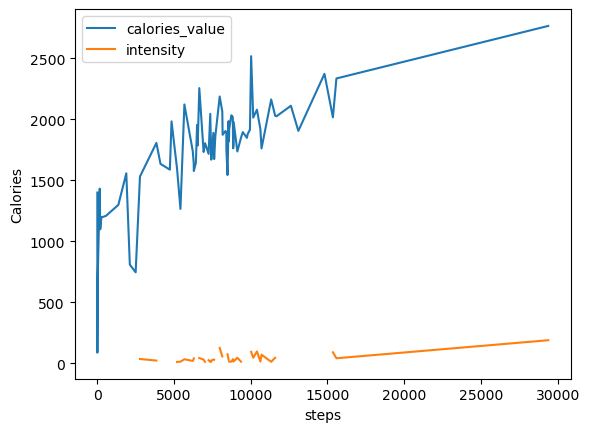

In [24]:
fitbit_grouped_df.copy().sort_values('steps').plot(x='steps', y=['calories_value', 'intensity'])
# plt.title('')
plt.ylabel('Calories')
plt.show()

/var/folders/jn/tpkp2dnx08592l_y59z9_f3m0000gn/T/ipykernel_69682/2768316718.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (key, group), color in zip(fitbit_grouped_df.groupby(['user/id']), colors):


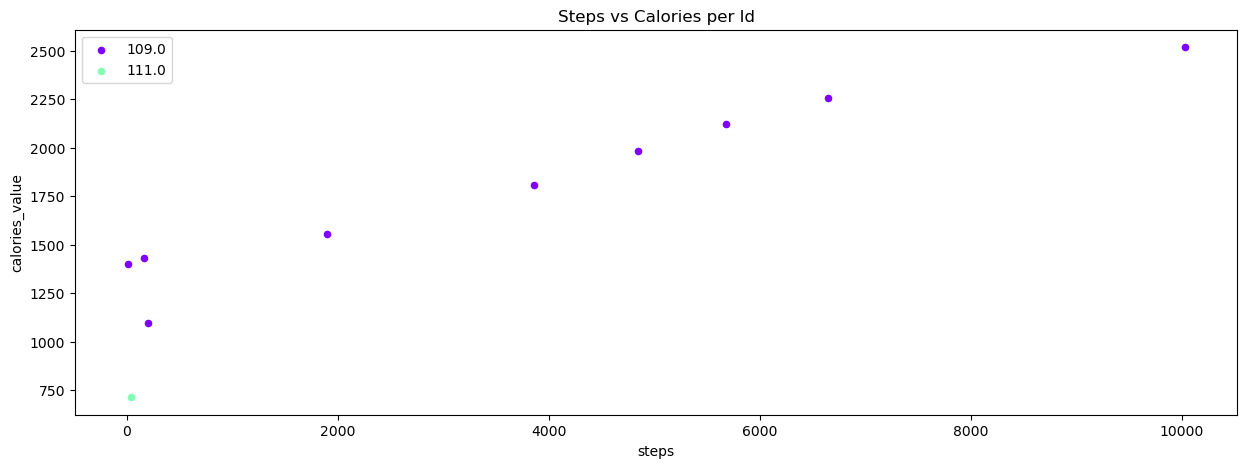

In [25]:
fig, ax = plt.subplots()
colors = cm.rainbow(np.linspace(0, 1, len(fitbit_grouped_df['user/id'].unique())))
for (key, group), color in zip(fitbit_grouped_df.groupby(['user/id']), colors):
    ax = group.plot(ax=ax, kind='scatter', x='steps', y='calories_value', label=key, c=np.array([color]), figsize=(15, 5))
    # ax.get_legend().remove()
plt.title('Steps vs Calories per Id')
plt.show()

In [26]:
# ^displays the lack of user/id specific data

# Save cleaned and preprocessed datasets

In [27]:
fitbit_df.to_csv('../../data/client_data/cleaned/fitbit/cleaned_fitbit_full.csv', index=False)
fitbit_grouped_df.to_csv('../../data/client_data/cleaned/fitbit/cleaned_fitbit_grouped_dups.csv', index=False)

In [28]:
fitbit_grouped_df['intensity'].describe()

count     42.000000
mean      39.190476
std       36.662760
min       10.000000
25%       13.000000
50%       29.500000
75%       44.000000
max      188.000000
Name: intensity, dtype: float64